In [131]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [132]:
dir = "p_date=2023-01-11-17_54_10"

In [133]:
path = f'../../output/weights/{dir}/log.json'
#path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

14001 records
dict_keys(['loss', 'mae', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [134]:
slice = 100_000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss) + 100000
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [135]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 1_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.hlines(y=0, xmin=0, xmax=max(data.keys()), linewidth=2, color='purple')
    
    plt.title(title)
    
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    #print(f"Moving Average (simple): {moving_average}")
    print()
    #print(f"Moving Average: {percent_list}")
    print("Values: " + " > ".join(map(str, moving_average.values())))
    print()
    
    print(f"Minimum (last {interval}): {min(list(data.values())[:-interval])}")
    print(f"Average (last {interval}): {np.mean(list(data.values())[:-interval])}")
    print(f"Maximum (last {interval}): {max(list(data.values())[:-interval])}")

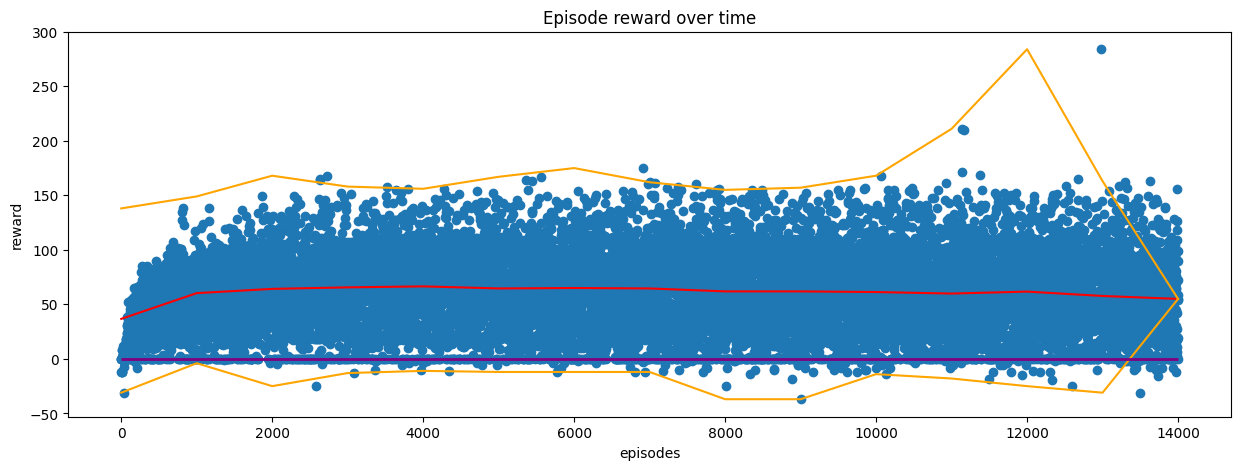

Maximum: 284.0
Average: 60.84993929005071

Values: 36.7 > 60.3 > 64.2 > 65.6 > 66.5 > 64.6 > 65.0 > 64.6 > 61.9 > 61.9 > 61.3 > 59.9 > 61.7 > 57.7 > 55.0

Minimum (last 1000): -37.0
Average (last 1000): 61.09283901238366
Maximum (last 1000): 284.0


In [136]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

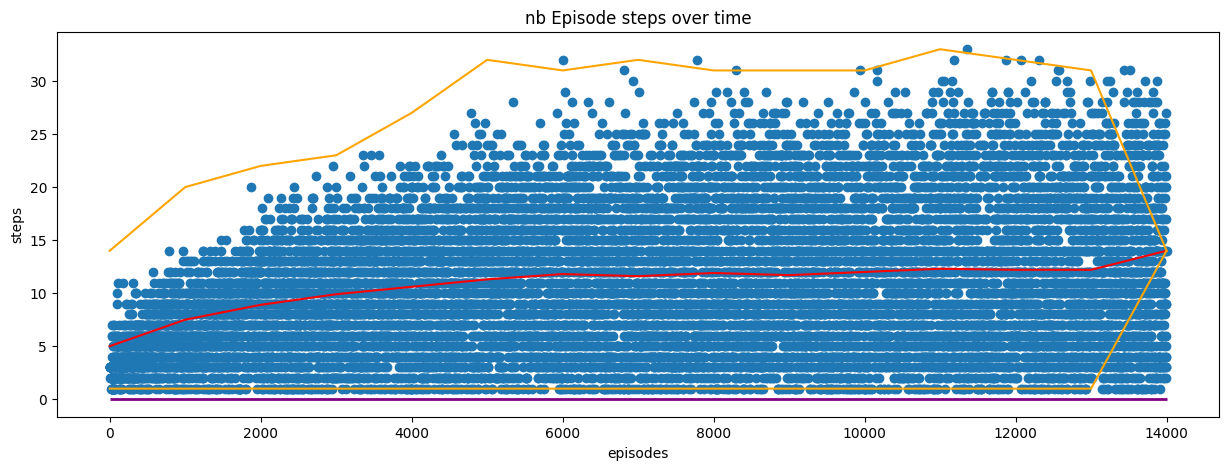

Maximum: 33
Average: 10.642382686950931

Values: 5.0 > 7.5 > 8.9 > 9.9 > 10.6 > 11.3 > 11.8 > 11.6 > 11.9 > 11.7 > 12.0 > 12.3 > 12.2 > 12.2 > 14

Minimum (last 1000): 1
Average (last 1000): 10.519575417275593
Maximum (last 1000): 33


In [137]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

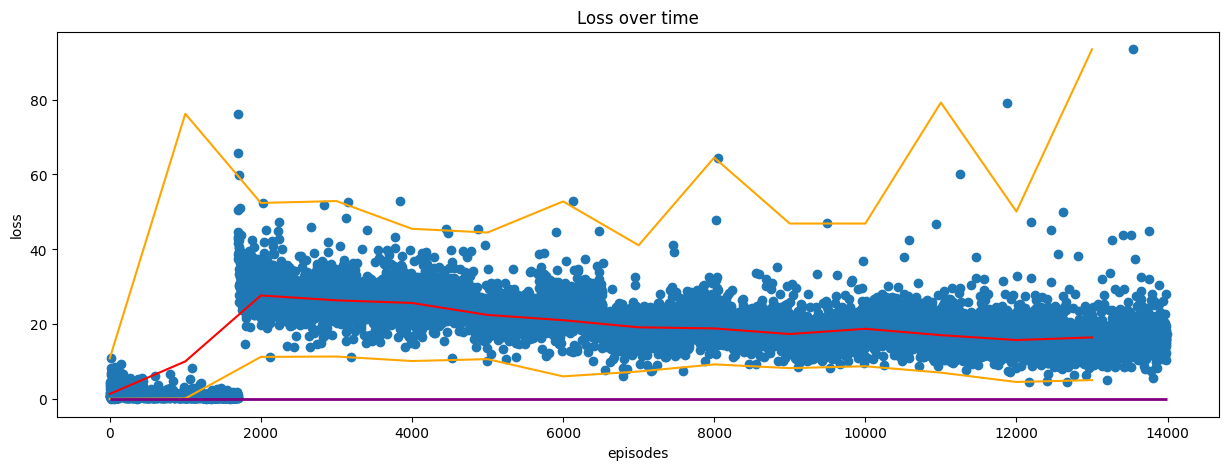

Maximum: 93.43721771240234
Average: 18.470862567049796

Values: 1.4 > 10.1 > 27.7 > 26.4 > 25.7 > 22.5 > 21.1 > 19.2 > 18.9 > 17.4 > 18.8 > 17.1 > 15.8 > 16.5

Minimum (last 1000): 0.12866559624671936
Average (last 1000): 18.627333191731985
Maximum (last 1000): 79.15079498291016


In [138]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

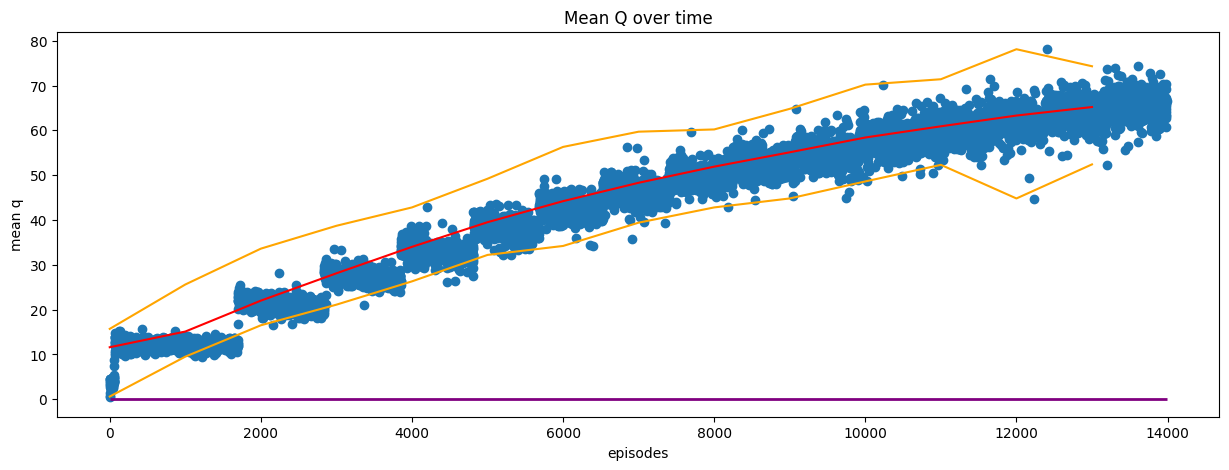

Maximum: 78.06468200683594
Average: 42.66014449003938

Values: 11.6 > 15.1 > 22.0 > 28.1 > 34.0 > 39.5 > 44.2 > 48.3 > 51.9 > 55.1 > 58.4 > 60.9 > 63.3 > 65.2

Minimum (last 1000): 0.5565993785858154
Average (last 1000): 40.927767001044245
Maximum (last 1000): 78.06468200683594


In [139]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

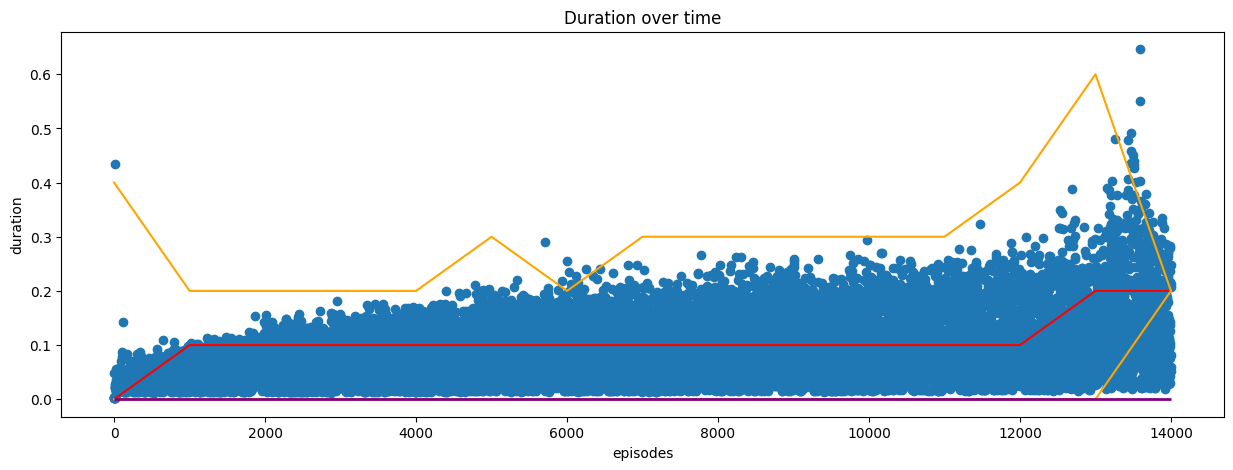

ZeroDivisionError: float division by zero

In [140]:
plot(duration, "Duration over time", "episodes", "duration")